In [1]:
# Ryanrudes' implementation adjusted for pong: https://github.com/ryanrudes/minimal_goexplore
from collections import defaultdict
from time import sleep
import numpy as np
import cv2
import sys
import gym

def cellfn(frame):
    cell = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    cell = cv2.resize(cell, (11, 8), interpolation = cv2.INTER_AREA)
    cell = cell // 32
    return cell

def hashfn(cell):
    return hash(cell.tobytes())

class Weights:
    times_chosen = 0.1
    times_chosen_since_new = 0
    times_seen = 0.3

class Powers:
    times_chosen = 0.5
    times_chosen_since_new = 0.5
    times_seen = 0.5

class Cell(object):
    def __init__(self):
        self.times_chosen = 0
        self.times_chosen_since_new = 0
        self.times_seen = 0

    def __setattr__(self, key, value):
        object.__setattr__(self, key, value)
        if key != 'score' and hasattr(self, 'times_seen'):
            self.score = self.cellscore()

    def cntscore(self, a):
        w = getattr(Weights, a)
        p = getattr(Powers, a)
        v = getattr(self, a)
        return w / (v + e1) ** p + e2

    def cellscore(self):
        return self.cntscore('times_chosen')           +\
               self.cntscore('times_chosen_since_new') +\
               self.cntscore('times_seen')             +\
               1

    def visit(self):
        self.times_seen += 1
        return self.times_seen == 1

    def choose(self):
        self.times_chosen += 1
        self.times_chosen_since_new += 1
        return self.ram, self.reward, self.trajectory

archive = defaultdict(lambda: Cell())
highscore = 0
frames = 0

e1 = 0.001
e2 = 0.00001

env = gym.make("PongDeterministic-v4")
frame = env.reset()
score = 0
action = 0
trajectory = []
iterations = 0




A.L.E: Arcade Learning Environment (version +978d2ce)
[Powered by Stella]


In [2]:
s = env.reset()
import matplotlib.pyplot as plt

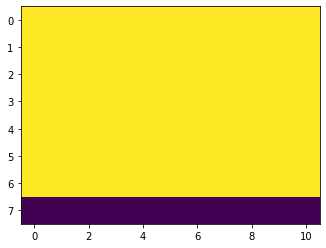

In [3]:
plt.imshow(cellfn(s))

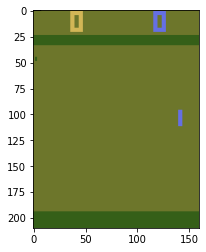

In [4]:
plt.imshow(s)

In [5]:
from tqdm import tqdm
for _ in tqdm(range(50000)):
    found_new_cell = False

    for i in range(100):
        if np.random.random() > 0.95:
            action = env.action_space.sample()

        frame, reward, terminal, info = env.step(action)
        #print(info)
        #if iterations % 100 == 0:
        #    env.render()
        score += reward
        #terminal |= info['lives'] < 6

        trajectory.append(action)
        frames += 1

        if score > highscore:
            highscore = score

        if terminal:
            break
        else:
            cell = cellfn(frame)
            cellhash = hashfn(cell)
            cell = archive[cellhash]
            first_visit = cell.visit()
            if first_visit or score > cell.reward or score == cell.reward and len(trajectory) < len(cell.trajectory):
                cell.ram = env.env.clone_full_state()
                cell.reward = score
                cell.trajectory = trajectory.copy()
                cell.times_chosen = 0
                cell.times_chosen_since_new = 0
                found_new_cell = True

    if found_new_cell and iterations > 0:
        restore_cell.times_chosen_since_new = 0

    iterations += 1
    scores = np.array([cell.score for cell in archive.values()])
    hashes = [*archive]
    probs = scores / scores.sum()
    restore = np.random.choice(hashes, p = probs)
    restore_cell = archive[restore]
    ram, score, trajectory = restore_cell.choose()
    env.reset()
    env.env.restore_full_state(ram)

    if iterations % 5000 == 0:
        print("Iterations: %d, Cells: %d, Frames: %d, Max Reward: %d" % (iterations, len(archive), frames, highscore))

  0%|                                                                                                                                                                                                                        | 0/50000 [00:00<?, ?it/s]/home/elgutto/Documents/masters/goexplore/atari/lib/python3.8/site-packages/gym/envs/atari/environment.py:353: UserWarning: WARN: `clone_full_state()` is deprecated and will be removed in a future release of `ale-py`. Please use `clone_state(include_rng=True)` which is equivalent to `clone_full_state`. 
  logger.warn(
/home/elgutto/Documents/masters/goexplore/atari/lib/python3.8/site-packages/gym/envs/atari/environment.py:361: UserWarning: WARN: restore_full_state() is deprecated and will be removed in a future release of `ale-py`. Please use `restore_state(state)` which will restore the state regardless of being a full or partial state. 
  logger.warn(
 10%|████████████████████▌                                                                 

Iterations: 5000, Cells: 72, Frames: 490255, Max Reward: 19


 20%|████████████████████████████████████████▊                                                                                                                                                                   | 10003/50000 [09:10<28:34, 23.32it/s]

Iterations: 10000, Cells: 72, Frames: 865119, Max Reward: 19


 30%|█████████████████████████████████████████████████████████████▏                                                                                                                                              | 15007/50000 [12:29<19:29, 29.93it/s]

Iterations: 15000, Cells: 72, Frames: 1162612, Max Reward: 19


 40%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                                                          | 20004/50000 [15:37<17:02, 29.35it/s]

Iterations: 20000, Cells: 72, Frames: 1443950, Max Reward: 19


 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                      | 25007/50000 [18:41<11:38, 35.76it/s]

Iterations: 25000, Cells: 72, Frames: 1716825, Max Reward: 19


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 30003/50000 [21:48<11:00, 30.27it/s]

Iterations: 30000, Cells: 72, Frames: 1996443, Max Reward: 19


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 35003/50000 [24:53<09:28, 26.40it/s]

Iterations: 35000, Cells: 72, Frames: 2272056, Max Reward: 19


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 40004/50000 [27:57<05:25, 30.74it/s]

Iterations: 40000, Cells: 72, Frames: 2544581, Max Reward: 19


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 45006/50000 [31:01<02:07, 39.24it/s]

Iterations: 45000, Cells: 72, Frames: 2817664, Max Reward: 19


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [34:04<00:00, 24.45it/s]

Iterations: 50000, Cells: 72, Frames: 3089075, Max Reward: 19


In [7]:
c = list(archive.values())[1]

In [8]:
c

In [12]:

from gym.envs.classic_control import rendering
def repeat_upsample(rgb_array, k=1, l=1, err=[]):
    # repeat kinda crashes if k/l are zero
    if k <= 0 or l <= 0: 
        if not err: 
            err.append('logged')
        return rgb_array

    # repeat the pixels k times along the y axis and l times along the x axis
    # if the input image is of shape (m,n,3), the output image will be of shape (k*m, l*n, 3)

    return np.repeat(np.repeat(rgb_array, k, axis=0), l, axis=1)

viewer = rendering.SimpleImageViewer()

In [13]:
replay(c.trajectory)

In [10]:
def replay(trajectory):
    env.reset()
    done = False
    for action in trajectory:
        _, _, done, _ = env.step(action)
        
        rgb = env.render('rgb_array')
        img = repeat_upsample(rgb, 4, 4)
        viewer.imshow(img)
        
        if done: break
        
    env.close()

In [14]:
len(c.trajectory)

5756

In [6]:
[cell.reward for cell in archive.values()][1]

18.0